<a href="https://colab.research.google.com/github/Krazahra/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Kinanti Rahayu Az-Zahra

Kelas: Tk-45-04

NIM: 1103210052

Materi: Logistic Regression

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

#Baca File
data = pd.read_csv('/content/drive/MyDrive/Dataset/diabetes2.csv')

# Memisahkan fitur (X) dan target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat dan melatih model regresi logistik
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Memprediksi label pada data pengujian
predictions = model.predict(X_test_scaled)

# Mengukur performa model
accuracy = accuracy_score(y_test, predictions)
print("Akurasi:", accuracy)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, predictions))


Akurasi: 0.7532467532467533

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



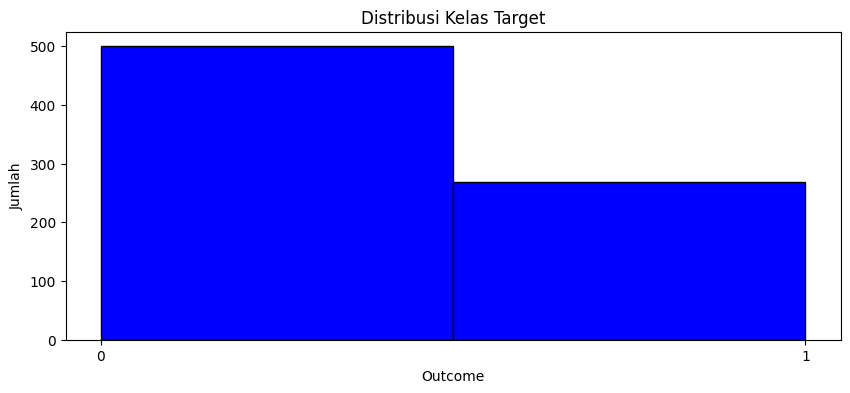

In [69]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(10, 4))
plt.hist(y, bins=2, color='blue', edgecolor='black')
plt.xlabel('Outcome')
plt.ylabel('Jumlah')
plt.title('Distribusi Kelas Target')
plt.xticks([0, 1])
plt.show()

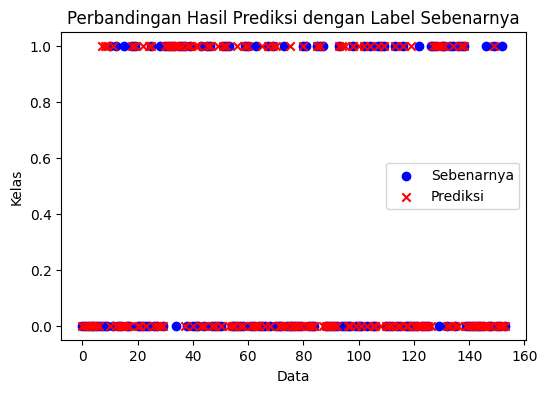

In [70]:
# Visualisasi perbandingan hasil prediksi dengan label sebenarnya
plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), y_test, color='blue', marker='o', label='Sebenarnya')
plt.scatter(range(len(predictions)), predictions, color='red', marker='x', label='Prediksi')
plt.xlabel('Data')
plt.ylabel('Kelas')
plt.title('Perbandingan Hasil Prediksi dengan Label Sebenarnya')
plt.legend()
plt.show()